In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.mlab as mlab
import math
from datetime import datetime, date
%matplotlib inline

style.use('ggplot')

In [3]:
''' Extract and Filter Data'''

# pel_prices = pd.read_excel('pel_returns.xlsx')
pel_prices = pd.read_excel('pel_returns_tot.xlsx')
pel_prices = pel_prices.iloc[: , [0,1,2,3,4,11,12]] # keep these cols

pel_prices['Returns'] = pel_prices['Close Price'].pct_change() # get returns

# reorder
new_order = ['Date', 'Open Price', 'Close Price', 'Returns', 'High Price', 'Low Price','Spread High-Low', 'Spread Close-Open']
pel_prices = pel_prices.reindex(columns=new_order)
pel_prices

,Date,Open Price,Close Price,Returns,High Price,Low Price,Spread High-Low,Spread Close-Open
0,2010-01-18,94.70,92.00,NaN,94.70,91.15,3.55,-2.70
1,2010-01-19,92.00,91.70,-0.003261,92.70,91.50,1.20,-0.30
2,2010-01-20,90.10,88.65,-0.033261,91.95,88.25,3.70,-1.45
3,2010-01-21,90.90,84.90,-0.042301,90.90,84.50,6.40,-6.00
4,2010-01-22,83.00,82.20,-0.031802,84.50,80.70,3.80,-0.80
5,2010-01-25,82.00,84.00,0.021898,84.55,80.00,4.55,2.00
6,2010-01-27,83.95,78.30,-0.067857,83.95,78.00,5.95,-5.65
7,2010-01-28,80.85,75.85,-0.031290,80.85,75.00,5.85,-5.00
8,2010-01-29,76.00,80.95,0.067238,83.70,74.50,9.20,4.95
9,2010-02-01,80.95,83.30,0.029030,84.95,80.65,4.30,2.35


<Figure size 1440x720 with 0 Axes>

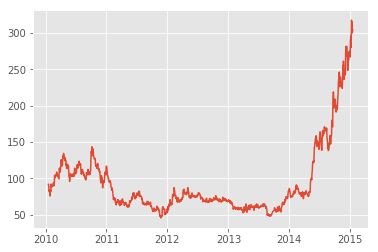

<Figure size 1440x720 with 0 Axes>

In [4]:
plt.plot(pel_prices['Date'], pel_prices['Close Price'])
plt.figure(figsize=(20, 10))

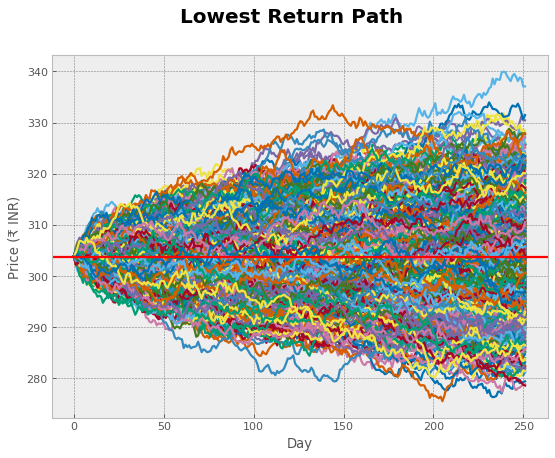

Expected Price (252 days): 303.9619974479335
Last Close: 303.75


In [8]:
num_simulations = 1000
predicted_days = 252
delta_t = 1/252
returns =  np.log(1 + pel_prices['Close Price'].pct_change())
prices = pel_prices['Close Price']
last_price = prices.iloc[-1]

simulation_df = pd.DataFrame()

for x in range(num_simulations):
            
    #Inputs
    count = 0
    avg_daily_ret = returns.mean()
    variance = returns.var()

    daily_vol = returns.std()
    daily_drift = avg_daily_ret - (variance/2)
    drift = daily_drift - 0.5 * variance

    #Append Start Value    
    prices = []

    shock = drift + daily_vol * np.random.normal()
    last_price * math.exp(shock)
    prices.append(last_price)

    for i in range(predicted_days):
        if count == 251:
            break
        shock = drift * delta_t + daily_vol * np.random.normal() * math.sqrt(delta_t)
        price = prices[count] * math.exp(shock)
        prices.append(price)
        count += 1
        
    simulation_df[x] = prices
    
fig = plt.figure(figsize=(8, 6), dpi=80,facecolor='w')
style.use('bmh')

title = 'Lowest Return Path'
#title = 'Lowest Return Path'
plt.plot(simulation_df)

fig.suptitle(title,fontsize=18, fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Price (₹ INR)')
plt.grid(True,color='grey')
plt.axhline(y=last_price, linestyle='-', color='r')
plt.show()

print('Expected Price (' + str(predicted_days) + ' days): ' + str(simulation_df.iloc[-1].mean()))
print('Last Close: ' + str(last_price))

In [5]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,303.750000,303.750000,303.750000,303.750000,303.750000,303.750000,303.750000,303.750000,303.750000,303.750000,...,303.750000,303.750000,303.750000,303.750000,303.750000,303.750000,303.750000,303.750000,303.750000,303.750000
1,304.506964,302.794256,303.856736,303.306427,304.521751,303.808981,304.103284,303.644365,303.465862,303.380655,...,303.624006,303.837721,304.053094,303.086393,303.962276,303.410090,303.774075,301.981145,304.476209,303.654139
2,305.388416,302.711120,304.061821,303.571321,304.282825,303.402177,304.274653,304.798240,303.352726,303.673156,...,303.386630,303.785181,304.188494,303.488192,303.039977,302.832229,303.747503,301.977731,304.586268,303.592880
3,306.899761,301.718583,303.860672,303.976583,303.955006,303.683691,304.545767,303.761580,302.378577,303.318681,...,302.865188,304.399886,304.109639,304.012613,302.462946,303.278417,303.860092,302.308399,305.247098,303.938847
4,306.643360,301.399610,303.292730,303.515806,303.210147,303.807709,304.314228,302.652346,302.322522,302.730153,...,303.119342,305.069693,303.481814,304.774176,303.088388,302.254757,303.998016,301.651790,305.694165,303.799239
5,307.091017,300.756088,304.156046,303.188370,303.834460,303.470652,304.979295,302.494005,301.587009,303.173134,...,302.768424,304.880264,303.916466,304.812385,303.178392,302.810630,304.139659,301.348291,306.553288,304.099109
6,308.300920,300.123580,304.699317,303.512756,304.999149,302.699832,306.380775,301.806680,302.171872,303.373543,...,303.684396,304.638285,303.440024,305.925685,302.661208,302.513354,303.920779,300.550020,306.307886,305.723392
7,308.149551,299.624094,305.459853,302.565481,306.361009,302.439800,306.510933,302.412132,302.171378,302.809694,...,302.962351,303.762526,303.767068,306.122300,302.611723,302.150282,303.888444,301.264069,306.107182,306.786026
8,307.592119,299.582998,305.009271,302.877460,306.313708,301.940693,305.739823,303.100302,301.662801,302.416392,...,303.297606,304.526023,302.984173,305.879859,302.313863,300.664546,303.143185,301.532996,306.483369,306.539378
9,308.897578,299.399293,304.340621,302.945681,306.792072,302.172044,306.018929,303.660057,301.868817,301.748366,...,302.972260,304.706210,303.041387,306.654893,302.232434,301.073533,304.248667,301.565282,306.937279,306.521265
